In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

In [3]:
survey_data = pd.read_csv(r'./Surveys/SmartLOCKMarketSurvey_US.csv')
survey_data.head()


,Gender,Age,Area,Income,Feature,Brand,NumberOfDevices,Preference,Heard,ShoppingOnline,Unlock
0,Male,34,suburban,$75.000 to $100.000,Friend’s recommendation,None of these,NaN,Price,Yes,55.0,Biometrics - photo
1,Female,44,suburban,$75.000 to $100.000,Safety,Loxone,10-15,Smart Features,Yes,39.0,Biometrics - eyescan
2,Female,36,urban,$50.000 to $75.000,Durability,None of these,NaN,Price,Yes,NaN,Bluetooth
3,Female,28,suburban,$25.000 to $50.000,Price,None of these,NaN,Smart Features,Yes,53.0,Biometrics - photo
4,Male,28,urban,$75.000 to $100.000,Durability,iNels,1-5,Price,Yes,51.0,Biometrics - photo


In [18]:
def age_group(age):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    # Convert to an int, in case the data is read in as an "object" (aka string)
    age = int(age)
    
    if age < 30:
        bucket = '<30'
    
    # Age 30 to 39 ('range' excludes upper bound)
    if age in range(30, 40):
        bucket = '30-39'
        
    if age in range(40, 50):
        bucket = '40-49'
        
    if age in range(50, 60):
        bucket = '50-59'
   
    if age >= 60:
        bucket = '60+'

    return bucket 

In [19]:
def so_group(ShoppingOnline):
    
    """Creates an age bucket for each participant using the shopping_online variable.
        Meant to be used on a DataFrame with .apply()."""
    
    # Convert to an int, in case the data is read in as an "object" (aka string)
    so = ShoppingOnline
    
    if np.isnan(so):
        bucket = 'NaN'
        return bucket
    
    if so < 20:
        bucket = '<20'
    
    # Age 30 to 39 ('range' excludes upper bound)
    if so in range(20, 40):
        bucket = '20-39'
        
    if so in range(40, 60):
        bucket = '40-59'
        
    if so in range(60, 80):
        bucket = '50-59'
   
    if so >= 80:
        bucket = '>80'

    return bucket 

In [20]:
def encode_income(income):
    """Takes a string indicating income and encodes it to an ordinal
    (numerical) variable."""
        
    if income == 'Less than $25.000':
        x = 1
        
    if income == '$25.000 to $50.000':
        x = 2
    
    if income == '$50.000 to $75.000':
        x = 3
        
    if income == '$75.000 to $100.000':
        x = 4
        
    if income == '$100.000 to $150.000':
        x = 5
        
    if income == '$150.000 or More':
        x = 6

    return x  


In [21]:
survey_data['age_group'] = survey_data['Age'].apply(age_group)

survey_data['age_group'].head(3)

0    30-39
1    40-49
2    30-39
Name: age_group, dtype: object

In [22]:
survey_data['ShoppingOnline_group'] = survey_data['ShoppingOnline'].apply(so_group)

survey_data['ShoppingOnline_group'].head(5)

0    40-59
1    20-39
2      NaN
3    40-59
4    40-59
Name: ShoppingOnline_group, dtype: object

In [34]:
survey_data['Encoded_income'] = survey_data['Income'].apply(encode_income)

In [36]:
# Subset the columns from when the question "Preference" is asked, 
# through to all the available answers. Easiest to use .iloc for this
survey_data.iloc[:7, 4:]

,Feature,Brand,NumberOfDevices,Preference,Heard,ShoppingOnline,Unlock,ShoppingOnline_group,age_group,Encoded_income
0,Friend’s recommendation,None of these,NaN,Price,Yes,55.0,Biometrics - photo,40-59,30-39,4
1,Safety,Loxone,10-15,Smart Features,Yes,39.0,Biometrics - eyescan,20-39,40-49,4
2,Durability,None of these,NaN,Price,Yes,NaN,Bluetooth,NaN,30-39,3
3,Price,None of these,NaN,Smart Features,Yes,53.0,Biometrics - photo,40-59,<30,2
4,Durability,iNels,1-5,Price,Yes,51.0,Biometrics - photo,40-59,<30,4
5,Durability,None of these,NaN,Price,Yes,59.0,Remote unlock by application,40-59,30-39,1
6,Safety,None of these,NaN,Smart Features,Yes,40.0,Biometrics - eyescan,40-59,40-49,4


In [24]:
# Next, assign it to a separate variable corresponding to your question
important_consideration = survey_data.iloc[:, 4:10]

In [25]:
important_consideration.head(5)

,Feature,Brand,NumberOfDevices,Preference,Heard,ShoppingOnline
0,Friend’s recommendation,None of these,NaN,Price,Yes,55.0
1,Safety,Loxone,10-15,Smart Features,Yes,39.0
2,Durability,None of these,NaN,Price,Yes,NaN
3,Price,None of these,NaN,Smart Features,Yes,53.0
4,Durability,iNels,1-5,Price,Yes,51.0


In [26]:
important_consideration['age_group'] = survey_data['age_group']
consideration_grouped = important_consideration.groupby('age_group').agg('count')

consideration_grouped

,Feature,Brand,NumberOfDevices,Preference,Heard,ShoppingOnline
age_group,,,,,,
30-39,621,621,323,621,621,561
40-49,195,195,93,195,195,172
50-59,15,15,5,15,15,13
<30,169,169,80,169,169,147


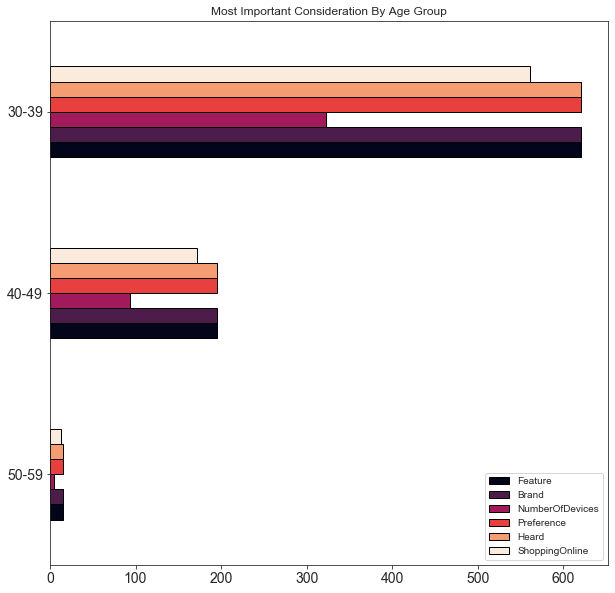

In [27]:
consideration_grouped[:-1].sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 10),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Most Important Consideration By Age Group'
    ).yaxis.label.set_visible(False)

In [28]:
def plot_counts_by_age_group(groupby_count_obj, age_group, ax=None):
    
    """Takes a count-aggregated groupby object, an age group, and an 
    (optional) AxesSubplot, and draws a barplot for that group."""
    
    sort_order = groupby_count_obj.loc[age_group].sort_index().index

    sns.barplot(y = groupby_count_obj.loc[age_group].index, 
                x = groupby_count_obj.loc[age_group].values, 
                order = sort_order, 
                palette = 'rocket', edgecolor = 'black', 
                ax = ax
                ).set_title("Age {}".format(age_group))

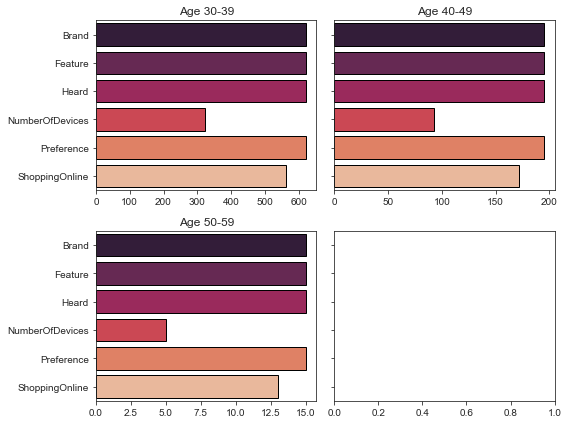

In [29]:
# Setup for the 2x2 subplot grid
# Note we don't want to share the x axis since we have counts
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), sharey=True)

# ax.flatten() avoids having to explicitly reference a subplot index in ax
# Use consideration_grouped.index[:-1] because we're not plotting the under-30s
for subplot, age_group in zip(ax.flatten(), list(consideration_grouped.index)[:-1]):
    plot_counts_by_age_group(consideration_grouped, age_group, ax=subplot)
    
plt.tight_layout()

In [30]:
def plot_benefit_question(df, col_dependent, col_conditional, cond_value,
                          palette='Spectral', ax=None):
    
    """Takes a relevant DataFrame, the name of the column (benefit) we want info on,
        and an age group, and returns a plot of the answers to that benefit question."""
    
    reduced_df = df[[col_dependent, col_conditional]]

    # Gets the relative frequencies (percentages) for "this-age-group" only
    data_to_plot = reduced_df[reduced_df[col_conditional] == cond_value][col_dependent].value_counts(normalize=True)
    
    sns.barplot(y = data_to_plot.index, 
                x = data_to_plot.values, 
                ax = ax,
                palette = palette, 
                edgecolor = 'black'
                ).set_title('{} - {} : {}'.format(col_dependent, col_conditional,cond_value))

In [31]:
explanatory_columns=survey_data.columns[[0,2,3]]
expr_columns=survey_data.columns[[4,5,6,7,8,10,12]]

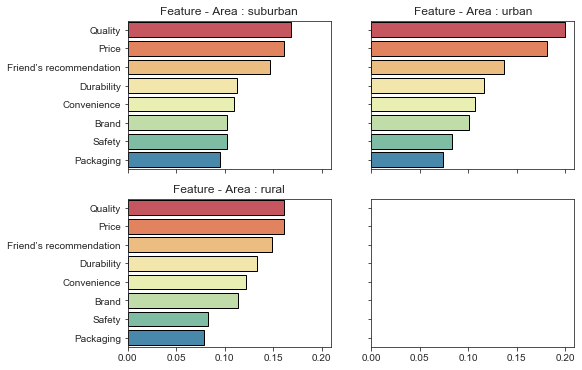

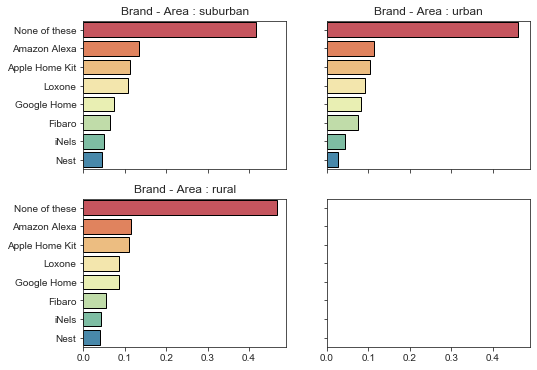

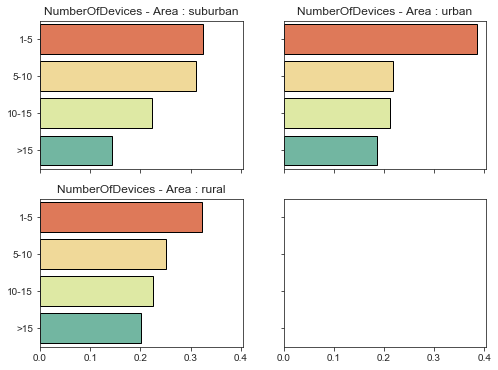

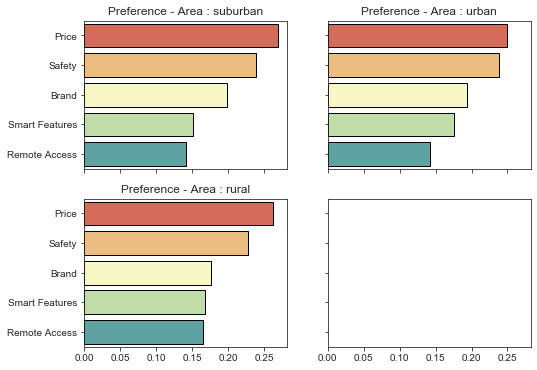

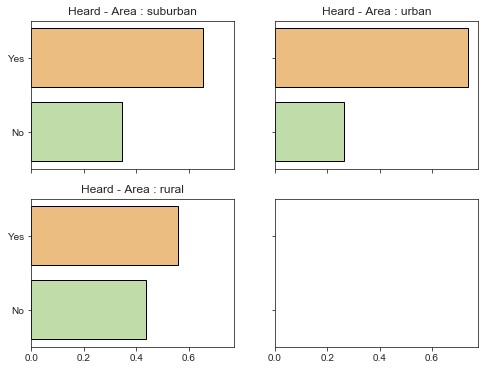

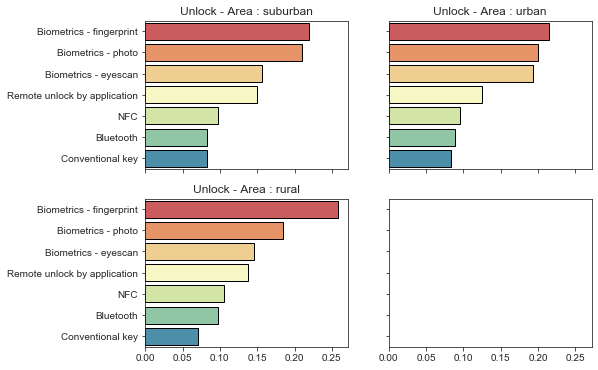

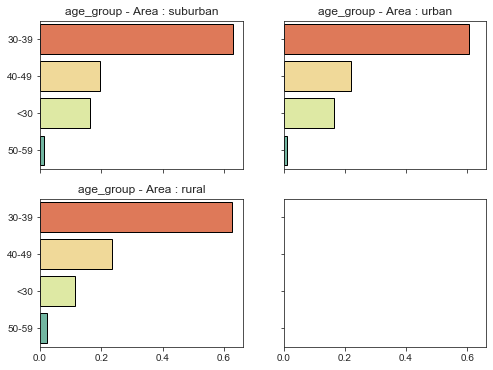

In [32]:
col_conditional=explanatory_columns[1]

for col in expr_columns:
    cond_values=survey_data[col_conditional].unique()
    fig, ax = plt.subplots(nrows=2, ncols=int(np.ceil(len(cond_values)/2)), figsize=(8, 6), 
                               sharey=True, sharex=True)
    for a, cond_value in zip(ax.flatten(), cond_values):
            plot_benefit_question(survey_data, col, col_conditional,
                                  cond_value, ax=a)

In [38]:
corr_data=survey_data[['Encoded_income',expr_columns[0]]]
corr_matrix = corr_data.corr(method='spearman')


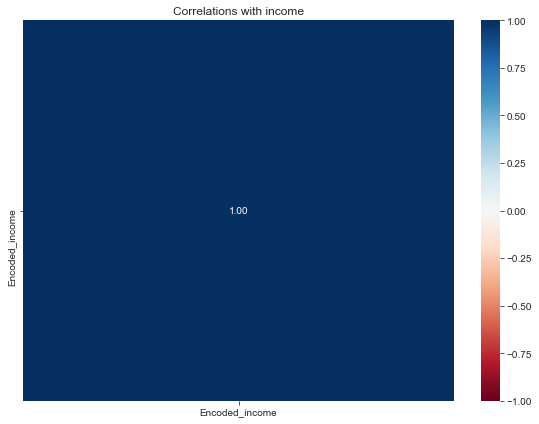

In [39]:
# Setup
fig, ax = plt.subplots(figsize=(8, 6))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations with income")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

In [43]:
corr_matrix

,Encoded_income
Encoded_income,1.0
